In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
bmi_median = df['BMI'].median()
df['BMI'].replace(0,bmi_median, inplace=True)

df['Insulin'].replace(0,df['Insulin'].median(), inplace=True)

df['SkinThickness'].replace(0,df['SkinThickness'].median(), inplace=True)

df['Glucose'].replace(0,df['Glucose'].median(), inplace=True)


<AxesSubplot:title={'center':'Pearson Correlation of Variables'}>

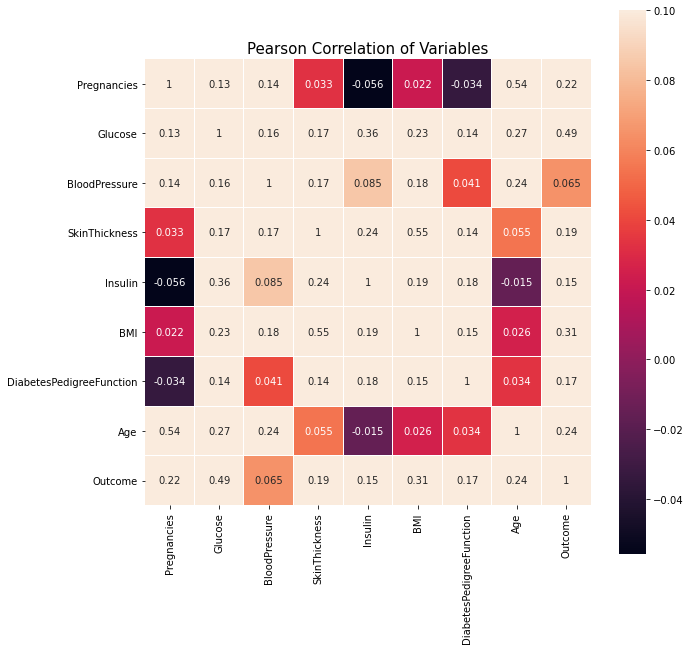

In [5]:
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Variables',y=1, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.1,square=True,linecolor='white',annot=True)

In [6]:
X = df.drop('Outcome', axis='columns')
y = df['Outcome']

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
#Scaling The Training Data
x = X.values
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled, columns=X.columns)

In [8]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.590164,0.304348,0.019832,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.540984,0.239130,0.019832,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.524590,0.173913,0.019832,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.540984,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.327869,0.304348,0.185096,0.509202,0.943638,0.200000


In [16]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb 
import lightgbm as lgb

In [24]:
model_params = {
    'svm': {
        'model': SVC(max_iter=-1),
        'params' : {
            'C': [1,10,20],
            'kernel': ['linear', 'rbf',],
            'gamma' :['scale', 'auto']
            #'shrinking':['True', 'False']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,100],
            'max_depth': [1,2,3,4,5,6],
            'min_samples_leaf': [100,200,300,500,1000]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [1,5,10, 100],
            'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
        }
    },
#     'naive_bayes_gaussian': {
#         'model': GaussianNB(),
#         'params': {}
#     },
#     'naive_bayes_multinomial': {
#         'model': MultinomialNB(),
#         'params': {}
#     },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            'max_depth': [1,2,3,4,5,6],
            'min_samples_leaf': [100,200,300,500,1000]
        }
    },
    
    'kneighbours': {
        'model': KNeighborsClassifier(n_jobs=-1),
        "params": {
            
            'n_neighbors' : [5, 10, 20, 30],
                    }
                },

    'xgboost' : {
          'model' : xgb.XGBClassifier(),
          'params': {'n_estimators': [1,5,10,100],
            'max_depth': [1,2,3,4,5,6],
            'learning_rate': [.001,.01, .1] 
            
            }
    }, 
    
    'lightbm' : {
          'model' : lgb.LGBMClassifier(is_unbalance=True),
          'params': {'num_leaves': [1,5,10,100],
            'max_depth': [1,2,3,4,5,6],
            'learning_rate': [.001,.01, .1] 
            }
    }, 
    
}

In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
#     print(model_name)
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
score_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [ ]:
score_df.sort_values('best_score')